# Coding Discussion 4 
### Kelly Looman

In [173]:
# Import libraries 
import numpy as np
import pandas as pd
import requests
import string
import seaborn as sns

In [174]:
def read_in_text(txt=None): 
    '''
    Converts a text file (input) into a string (output).
    '''

    with open(txt) as f:
      data = f.read()
      return(data)
    
data1 = read_in_text('../Data/aljazeera-khashoggi.txt')
data2 = read_in_text('../Data/bbc-khashoggi.txt')
data3 = read_in_text('../Data/breitbart-khashoggi.txt')
data4 = read_in_text('../Data/cnn-khashoggi.txt')
data5 = read_in_text('../Data/fox-khashoggi.txt')

In [175]:
# Create dictionary of punctations to be removed 
mappings = {
    '[':'',
    ']':'',
    '.':'',
    ',':'',
    '(':'',
    ')':'',
    '"':'', 
    "'":'',
    '-':'',
    '?':'',
    '“':'',
    '”':'',
    '1':'',
    '2':'',
    '3':'',
    '4':'',
    '5':'',
    '6':'',
    '7':'',
    '8':'',
    '9':'',
    '0':'',
    ':':'',
    '$':'',
    '£':'',
    '—':''
}
tr_table = str.maketrans(mappings) 

# Remove punctuation from articles
s1 = data1.translate(tr_table)
s2 = data2.translate(tr_table)
s3 = data3.translate(tr_table)
s4 = data4.translate(tr_table)
s5 = data5.translate(tr_table)

In [176]:
def tokenize(text=None):
    '''
    Converts string (input) to lower case and splits
    string by \n. The output is a list. 
    
    '''
    text = text.lower()
    text_list = text.split()
    return text_list

In [177]:
def token_dict(s1=None):   
    '''
    Takes a list (input) and does a count of each word. 
    Output is a panda df. 
    '''
    d = dict()
    for word in tokenize(s1):
        if word in d:
            d[word][0] += 1
        else:
            d[word] = [1]
    return pd.DataFrame(d)

token_dict(s1)

,turkey,istanbul,turkish,president,recep,tayyip,erdogan,has,said,the,murder,of,journalist,jamal,khashoggi,at,kingdoms,consulate,in,was,planned,by,saudi,officials,days,advance,addressing,legislators,from,his,justice,and,development,party,ak,on,tuesday,detailed,khashoggis,disappearance,but,stopped,short,accusing,royals,savage,killing,that,caused,global,outrage,september,arrived,arabian,for,him,to,sort,out,wedding,paperwork,during,speech,parliament,capital,ankara,it,seems,time,they,started,plan,a,roadmap,he,added,some,left,travelled,arabia,indicating,washington,post,columnist,critic,powerful,crown,prince,mohammed,bin,salman,disappeared,after,entering,october,until,tuesdays,had,remained,largely,...,thing,confirmed,everything,we,heard,through,other,channels,told,al,jazeera,however,now,no,longer,attributed,what,happened,also,demanded,answers,mentioning,reports,local,cooperator,allegedly,disposed,there,are,claims,given,person,this,nobody,allowed,think,will,end,without,answering,these,taking,right,steps,working,carrying,arrests,nonresident,fellow,brookings,institution,doha,underlined,distinction,between,king,son,provided,pointed,towards,mbs,naming,specifically,clearly,trying,prevent,fullblown,crisis,riyadh,sunday,speaking,exclusive,interview,fox,news,arabias,foreign,minister,adel,aljubeir,terrible,tragedy,nothing,do,taha,ozhan,research,director,institute,thought,saudis,know,very,well,knows,doing,namely,asking,full,cooperation
0,4,5,7,4,1,1,12,6,6,38,6,11,1,1,4,6,1,6,10,6,2,3,15,6,2,1,1,1,1,6,1,10,1,2,1,11,1,1,3,1,3,1,1,1,1,2,5,14,1,2,1,1,1,2,3,1,13,2,2,1,1,2,4,1,1,5,4,1,1,3,1,1,11,1,4,2,1,1,1,4,1,1,1,1,1,1,2,2,1,3,4,1,1,1,2,3,1,2,1,1,...,2,2,2,1,1,1,1,1,2,2,2,1,1,1,1,1,4,2,3,1,1,1,1,3,1,1,1,1,1,1,1,2,3,1,1,1,1,1,2,1,1,2,3,2,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1


In [178]:
pd.set_option('display.max_columns', 200)
def gen_DTM(texts=None):
    '''
    Generate a document term matrix
    '''
    DTM = pd.DataFrame()
    for text in texts:
        entry = token_dict(text)
        DTM = DTM.append(pd.DataFrame(entry),ignore_index=True,sort=True) # Row bind
    
    DTM.fillna(0, inplace=True) # Fill in any missing values with 0s (i.e. when a word is in one text but not another)
    return DTM
    
gen_DTM([s1,s2,s3,s4,s5]) 

,a,abdulaziz,able,about,absent,accident,accidentally,accidentallyerdogan,according,account,accounts,accusation,accusing,acknowledged,added,adding,addition,address,addressing,adel,admitted,admitting,advance,after,again,agency,ago,aides,ak,akp,al,alerted,alibi,alive,aljubeir,all,allegation,allegedly,allow,allowed,ally,almost,alqahtani,also,although,am,among,amounted,an,and,ankara,ankaraamong,announced,anonymous,another,answered,answering,answers,anticipated,any,appeared,appearing,applause,arabia,arabian,arabias,arabia’s,arabic,are,area,arguing,around,arrested,arrests,arrival,arrived,arrives,as,asked,asking,assassination,associated,at,attempt,attempts,attendees,attributed,audience,audio,authenticity,authorities,authority,avoided,aware,back,bbc,bbcs,be,beard,became,...,tomorrow,tonight,took,top,topic,towards,traded,tragedy,trailed,transparent,travelled,tremendous,trial,trials,tried,trump,trumps,trump’s,truth,try,trying,tuesday,tuesdays,turkey,turkeys,turkish,turn,tv,two,uncomfortable,under,underlined,university,unnamed,unreality,unsatisfied,unsupported,until,up,urged,urgency,us,use,usher,very,via,victim,video,vision,visited,visiting,vote,waiting,wake,walked,want,wanted,was,washington,wasn’t,watch,watching,we,wearing,wedding,week,weeks,well,went,were,we’re,what,when,where,whether,which,while,white,who,whoever,whom,whose,why,widely,will,with,withheld,within,without,woods,working,world,worse,would,writer,yalova,yearold,yelova,yet,your
0,11,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,4.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,3,10,5.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1,2.0,1.0,1.0,0.0,6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1.0,4,0.0,7,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,2.0,0.0,1.0,4.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23,0.0,0.0,2,1.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,0.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,1.0,0.0,1.0,0.0,6,20,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,8,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,10,0.0,0.0,0.0,0.0,4,1.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,8,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,4,0.0,2,0.0,5,1.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,4.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,17,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,6.0,0.0,3.0,0.0,2.0,0.0,0.0,7.0,1.0,0.0,0.0,1.0,1.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,3.0
2,11,2.0,0.0,2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,2,8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,1,0.0,1,0.0,6,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,4.0,0.0,0.0,1.0,1.0,0.0,1.0,7.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,14,0.0,1.0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,3,

In [179]:
D = gen_DTM([s1,s2,s3,s4,s5])  

# Assign matrices to objects
alj = D.iloc[0].values
bbc = D.iloc[1].values
breitbart = D.iloc[2].values
cnn = D.iloc[3].values
fox = D.iloc[4].values

In [180]:
def cosine(a,b):
    '''
    Takes array (input) and find the cosine of the arrays (returned as a float) 
    '''
    cos = np.dot(a,b)/(np.sqrt(np.dot(a,a)) * np.sqrt(np.dot(b,b))  )
    return cos

<AxesSubplot:>

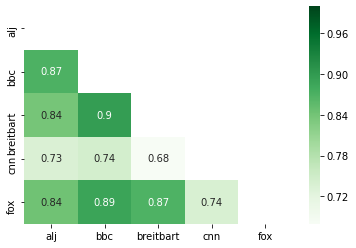

In [185]:
# Create dictionary of news sources and corresponding matrices
news_dict = {'alj': alj, 
              'bbc': bbc,
              'breitbart': breitbart,
              'cnn': cnn, 
              'fox': fox}

# Assign dictionary to matrix 
news_dict = pd.DataFrame(news_dict)

# Corr across new sources with cosine function 
news_data = news_dict.corr(method=cosine)

# Get lower triangle of the matrix
matrix = np.triu(news_data)

# Create a heatmap visualizing cos
sns.heatmap(news_data, annot=True, mask=matrix, cmap = "Greens")

## Removing Stopwords

In [186]:
# Read in stopwords csv 
stopwords = pd.read_csv("/Users/loomanke/Desktop/Data/stop_words.csv")

# Convert to list 
stopwords = stopwords['word'].tolist()

In [187]:
# Rewrite our token function to clean out these words
def tokenize_stopwords(text=None):
    '''
    A rewrite of the tokenize function to return words (string input)
    that are not in the stopwords list. Outputs a list. 
    '''
    text = text.lower()
    text_list = text.split()
    text_list2 = [word for word in text_list if word not in stopwords]
    return text_list2


In [188]:
def token_dict_stopwords(s1=None):  
    '''
    Rewrite of the token_dict function. Takes a list (input) and does a count of each word. 
    Output is a panda df. 
    '''
    d = dict()
    for word in tokenize_stopwords(s1):
        if word in d:
            d[word][0] += 1
        else:
            d[word] = [1]
    return pd.DataFrame(d)

In [189]:
def gen_DTM_stopwords(texts=None):
    '''
    Rewrite of the gen_DTM fucntion. Generate a document term matrix
    '''
    DTM = pd.DataFrame()
    for text in texts:
        entry = token_dict_stopwords(text)
        DTM = DTM.append(pd.DataFrame(entry),ignore_index=True,sort=True) # Row bind
    
    DTM.fillna(0, inplace=True) # Fill in any missing values with 0s (i.e. when a word is in one text but not another)
    return DTM
  
gen_DTM_stopwords([s1,s2,s3,s4,s5]) 

,abdulaziz,absent,accident,accidentally,accidentallyerdogan,account,accounts,accusation,accusing,acknowledged,added,adding,addition,address,addressing,adel,admitted,admitting,advance,agency,ago,aides,ak,akp,al,alerted,alibi,alive,aljubeir,allegation,allegedly,allowed,ally,alqahtani,amounted,ankara,ankaraamong,announced,anonymous,answered,answering,answers,anticipated,appeared,appearing,applause,arabia,arabian,arabias,arabia’s,arabic,arguing,arrested,arrests,arrival,arrived,arrives,assassination,attempt,attempts,attendees,attributed,audience,audio,authenticity,authorities,authority,avoided,aware,bbc,bbcs,beard,belgrad,belgrave,bin,blame,blaming,bn,body,bombshell,borders,bottom,brawlpeople,bring,broadcast,brookings,brutal,building,burden,business,cabinet,cafe,call,called,camera,capital,caption,carried,carry,carrying,...,speaking,specifically,speech,speechthe,spoke,squad,staff,stand,start,started,statement,stay,step,steps,stopped,story,stressed,strong,strongly,subject,suggested,sunday,support,surveillance,suspects,system,taha,taking,tape,tayyip,team,teams,term,terrible,texas,that’s,theyre,time,timeline,told,tomorrow,tonight,top,topic,traded,tragedy,trailed,transparent,travelled,tremendous,trial,trials,trump,trumps,trump’s,truth,tuesday,tuesdays,turkey,turkeys,turkish,tv,uncomfortable,underlined,university,unnamed,unreality,unsatisfied,unsupported,urged,urgency,usher,victim,video,vision,visited,visiting,vote,waiting,wake,walked,washington,wasn’t,watch,watching,wearing,wedding,week,weeks,we’re,white,widely,withheld,woods,world,worse,writer,yalova,yearold,yelova
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,4.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,4,0.0,7,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,8,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0,0.0,0.0,2.0,4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2,1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,4,0.0,2,0.0,5,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,1,0.0,1,0.0,6,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [194]:
D = gen_DTM_stopwords([s1,s2,s3,s4,s5])

# Assign matrices to objects
alj = D.iloc[0].values
bbc = D.iloc[1].values
breitbart = D.iloc[2].values
cnn = D.iloc[3].values
fox = D.iloc[4].values

<AxesSubplot:>

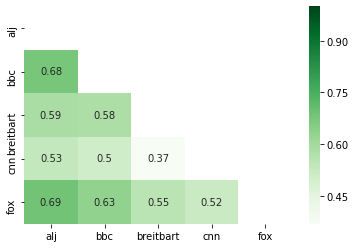

In [207]:
# Create dictionary of news sources and corresponding matrices
news_dict_final = {'alj': alj, 
                   'bbc': bbc,
                   'breitbart': breitbart,
                   'cnn': cnn, 
                   'fox': fox}

# Assign dictionary to matrix 
news_df_final = pd.DataFrame(news_dict_final)

# Corr across new sources with cosine function 
news_data_final = news_df_final.corr(method=cosine)

# Get lower triangle of the matrix
matrix = np.triu(news_data_final)

# Create a heatmap visualizing cos
sns.heatmap(news_data_final, annot=True, mask = matrix, cmap = "Greens")

## Discussion

It is evident that the first matrix, which included the stopwords in the cosine calculations, resulted in higher levels of similarity than the second matrix, which removed the stopwords. cosine(breitbart,bbc) with stopwords included, for instance, outputed a value of 0.9, while without the stopwords the output dropped to 0.58.

The stories from Fox, BBC, and Aljazeera had relatively high rates of similarity (0.63 to 0.69) compared to CNN and specifically CNN and Breitbart (0.37). I would like to make some type of substantiation of why this may be. For example,Aljazeera is funded by the Qatari government, which at the the time had strained relations with Saudi Arabia, Fox is typically a vocal critic of the Saudi government, and BBC viewed the issue as a violation of human rights, it begins to make sense why these news sources had similar reports. However, this is not a sentiment analysis and word similarity does not necessarily entail that the meaning or connotation were similar. 